In [1]:
import sys, os, glob, warnings, logging
import string
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest
from sw_qPCR import *

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [12]:
# Read in data from different plates and combine them
plate_ids = ['220516-plate1', '220525-plate1']

dfs = []
for plate_id in plate_ids:
#     dfs.append(get_plate_data(plate_id))
    dfs.append(get_plate_data(plate_id, sgRNA_test=False))

df = pd.concat(dfs)
df.reset_index(inplace=True, drop=True)

# Add a few helpful columns
df['group'] = [df.Sample[i] + '___' + df.Primer[i] for i in range(len(df))]
df['well_id'] = [df.plate_id[i] + '-' + df.Well[i] for i in range(len(df))]
df['relExp_25'] = [2**(25-df.Cq[i]) for i in range(len(df))]

df.head()

,Well,Sample,Primer,Cq,plate_id,group,well_id,relExp_25
0,A01,FVBN,Rps29 v1,18.981713,220516-plate1,FVBN___Rps29 v1,220516-plate1-A01,64.816395
1,A02,FVBN,Rps29 v2,18.396910,220516-plate1,FVBN___Rps29 v2,220516-plate1-A02,97.213884
2,A03,FVBN,Serpinh1 sg1 v1,38.043955,220516-plate1,FVBN___Serpinh1 sg1 v1,220516-plate1-A03,0.000118
3,A05,FVBN,Serpinh1 sg3 v1,24.531636,220516-plate1,FVBN___Serpinh1 sg3 v1,220516-plate1-A05,1.383540
4,A06,FVBN,Itga9 sg1 v1,27.413710,220516-plate1,FVBN___Itga9 sg1 v1,220516-plate1-A06,0.187673


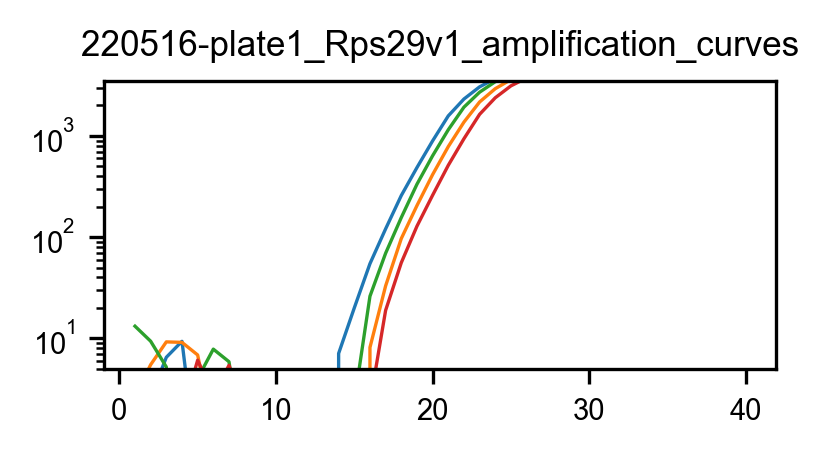

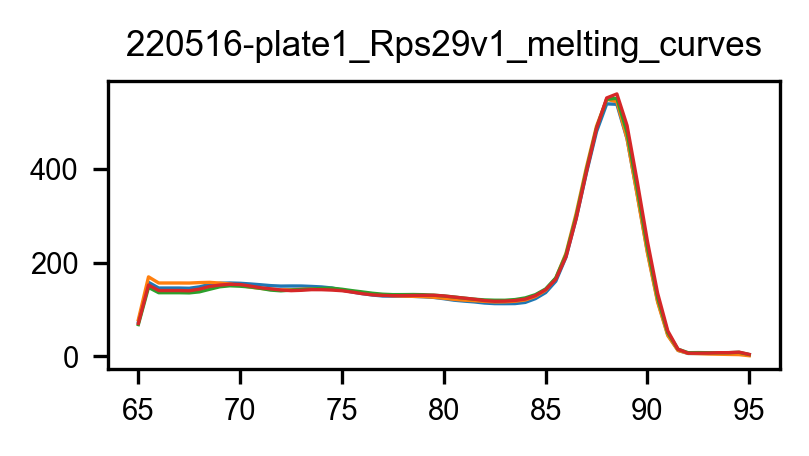

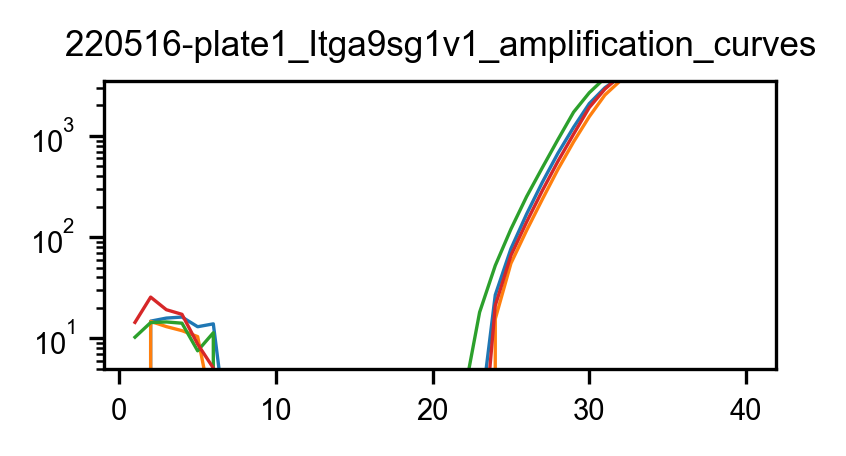

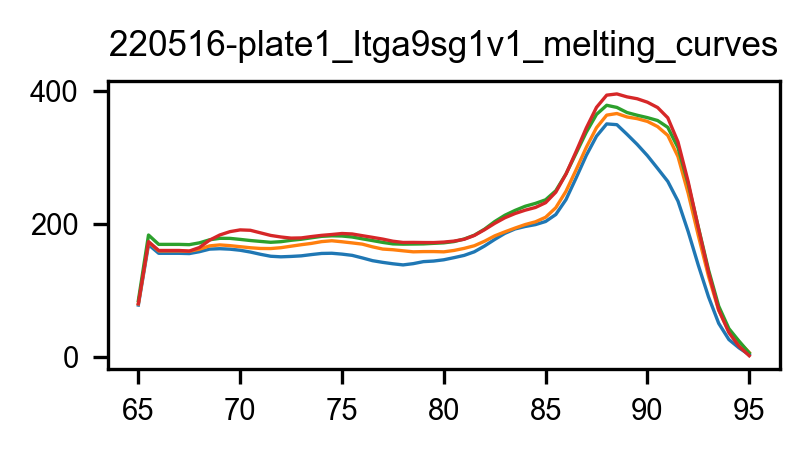

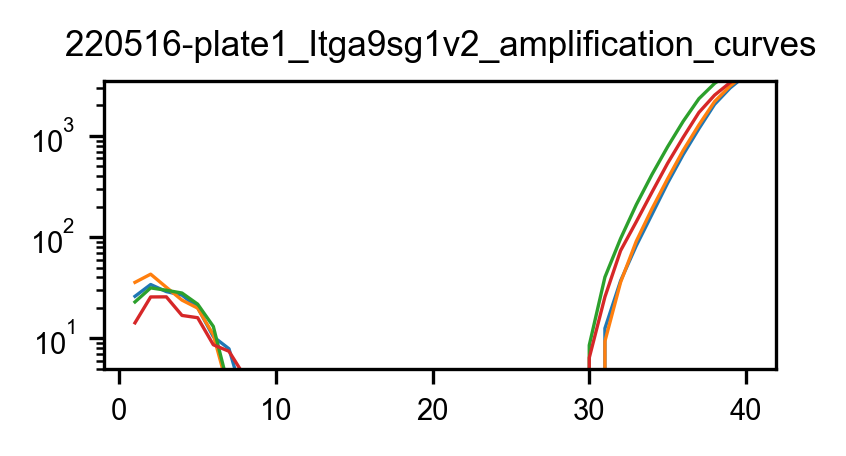

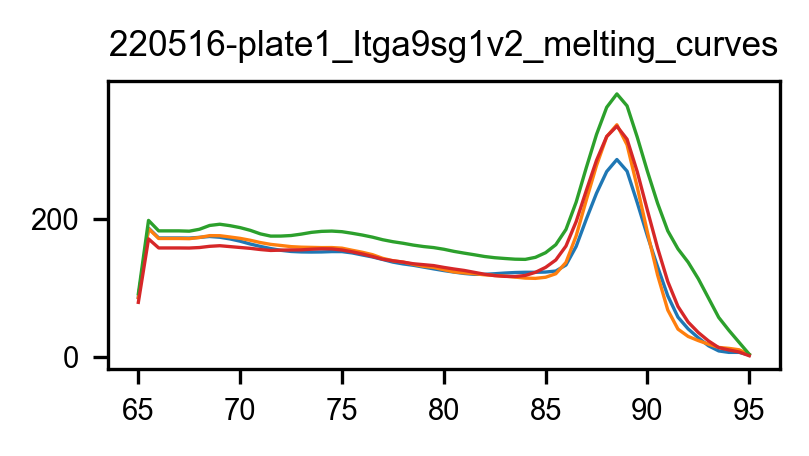

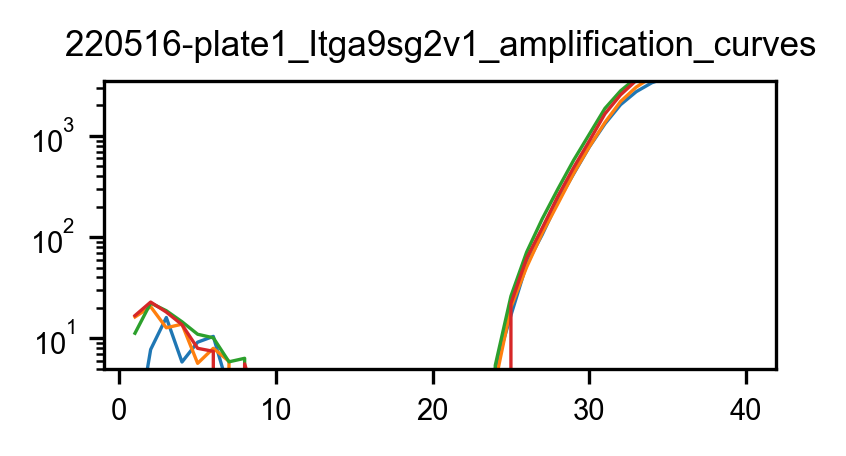

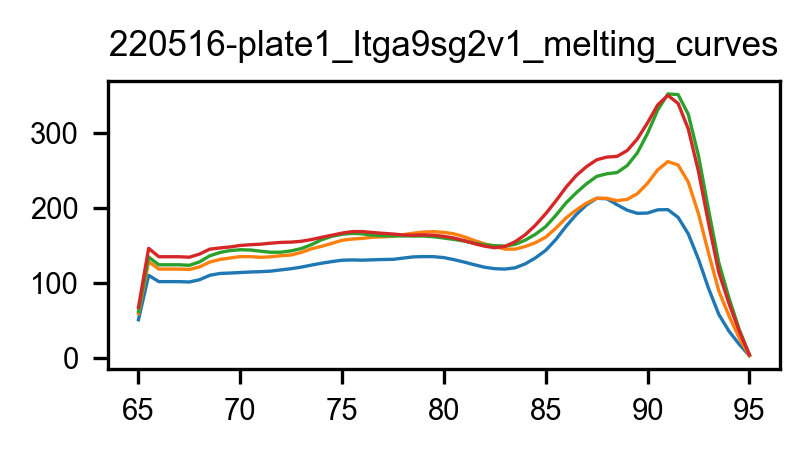

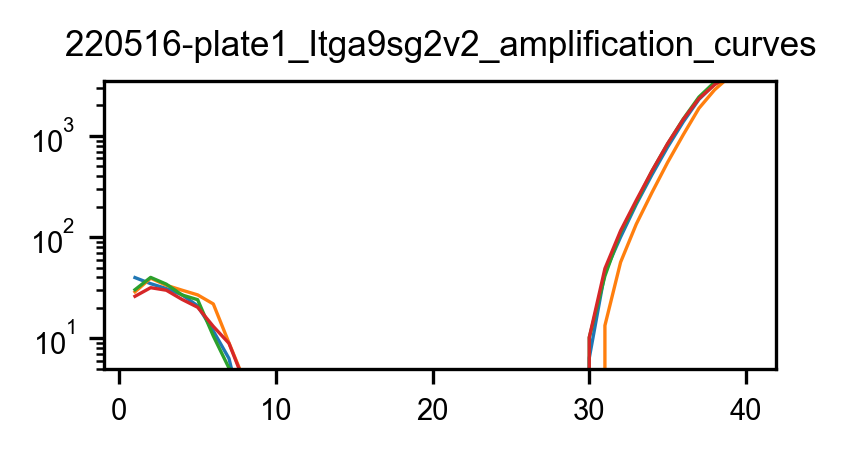

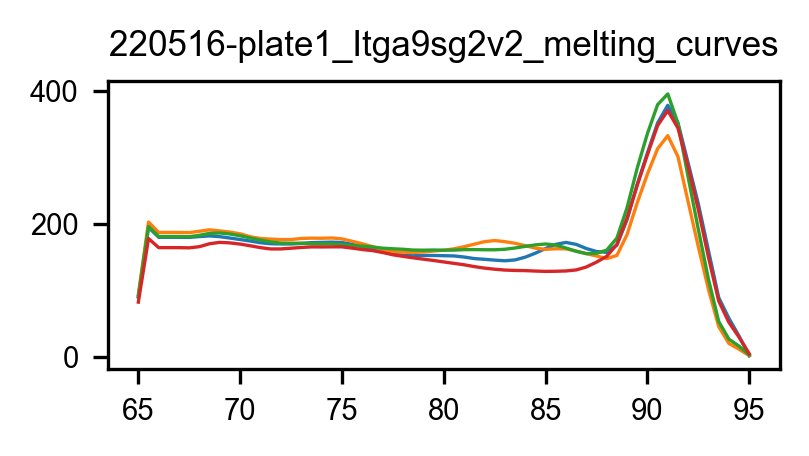

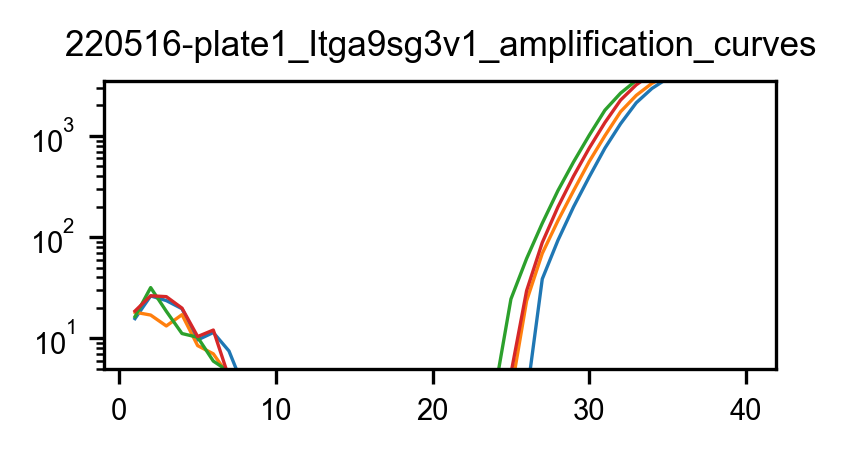

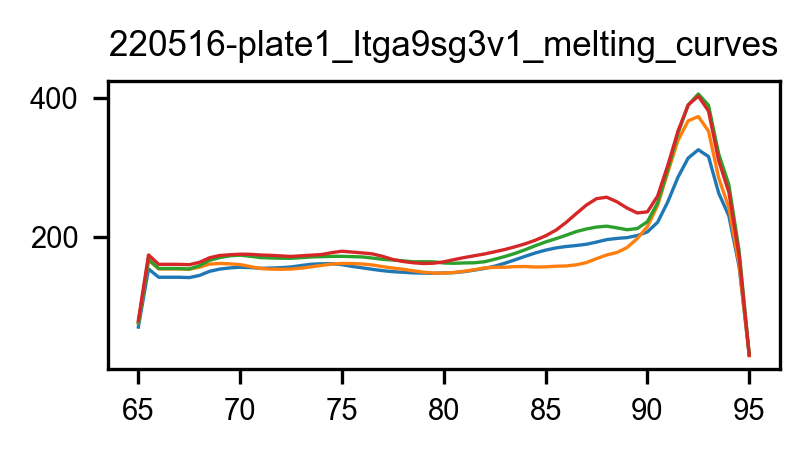

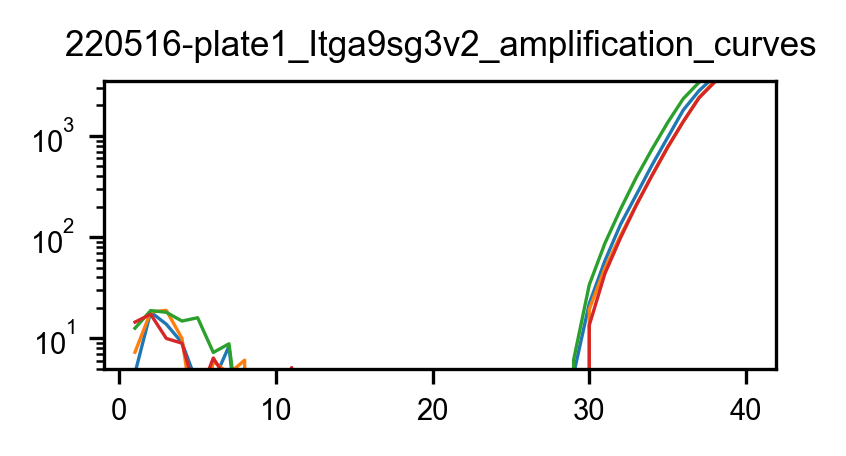

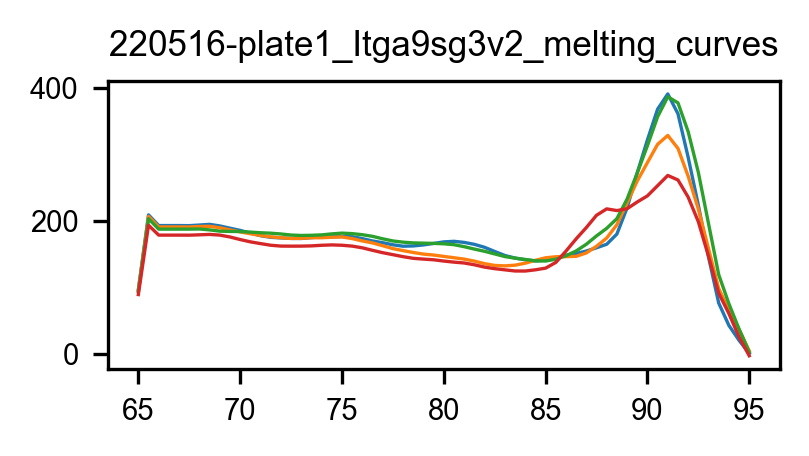

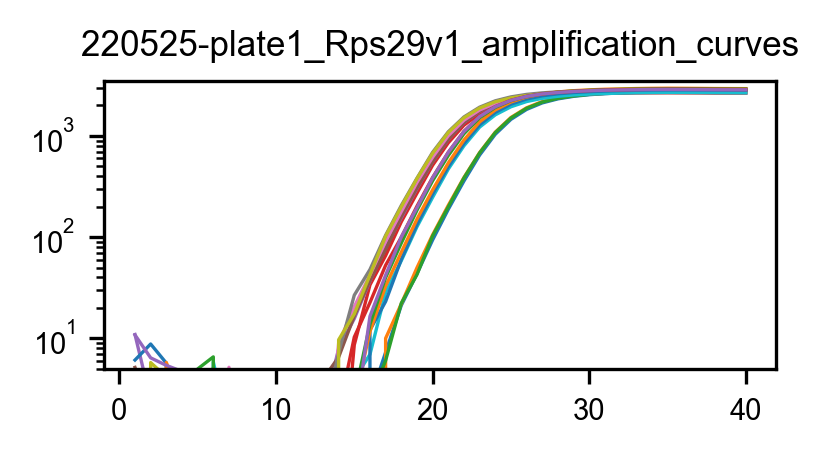

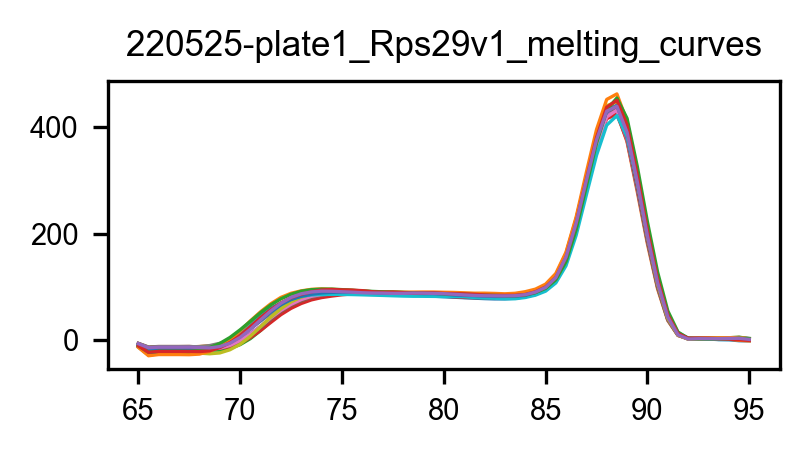

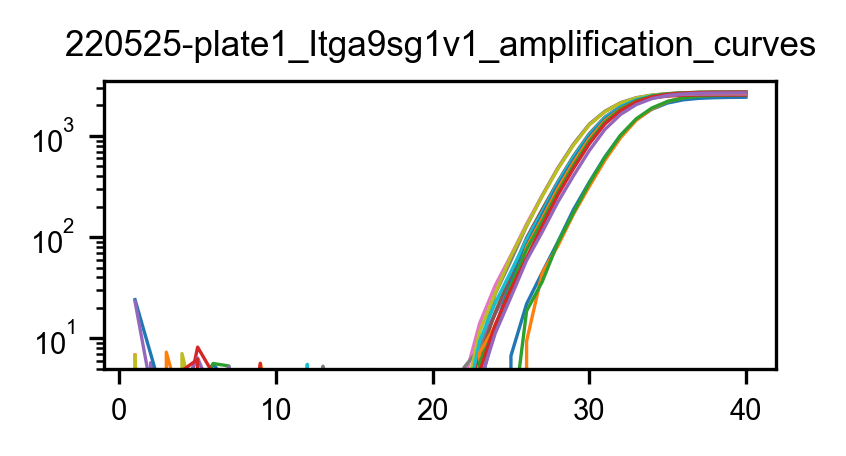

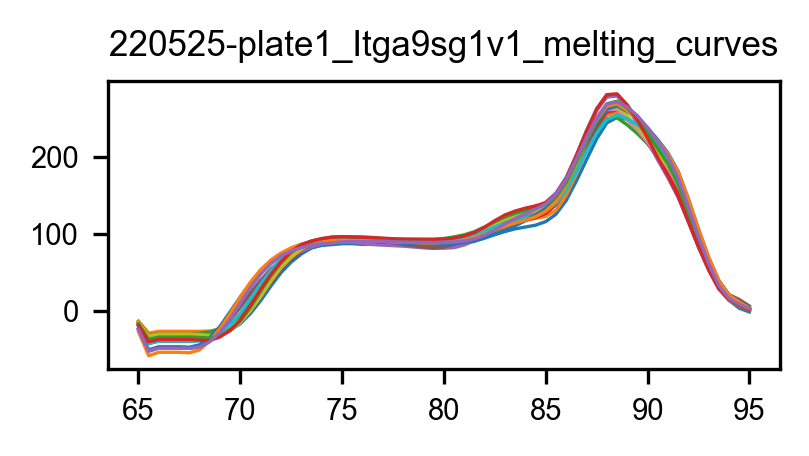

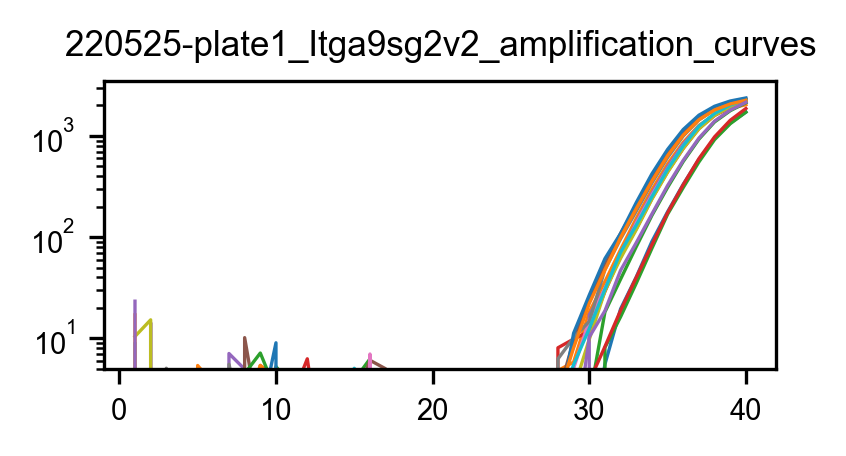

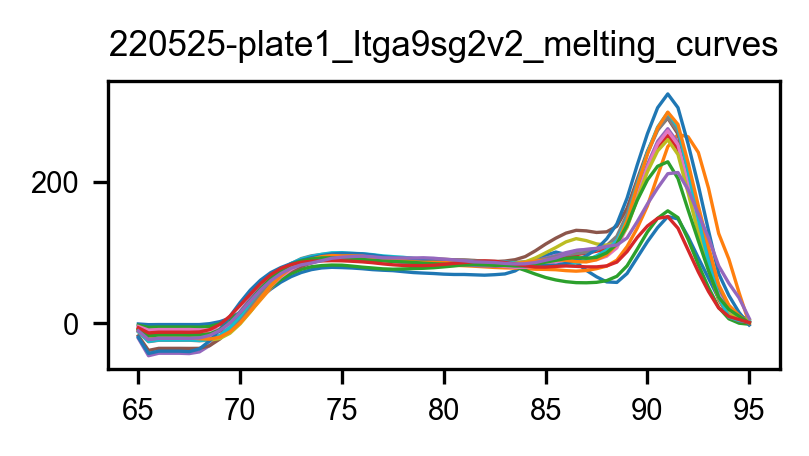

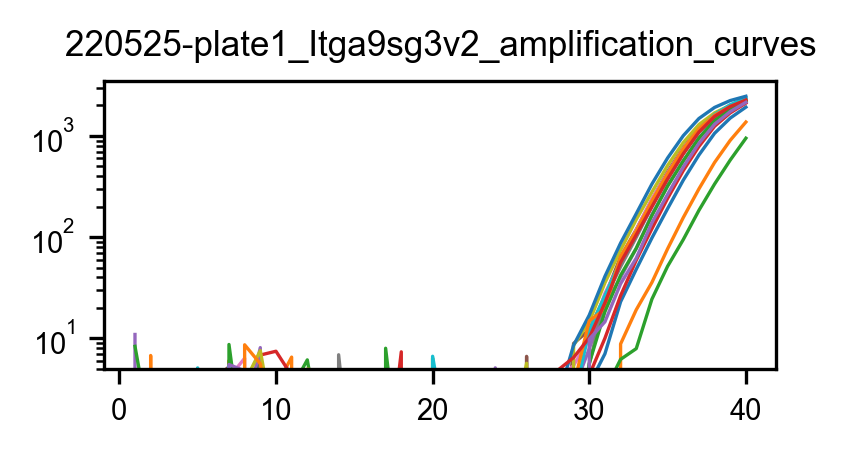

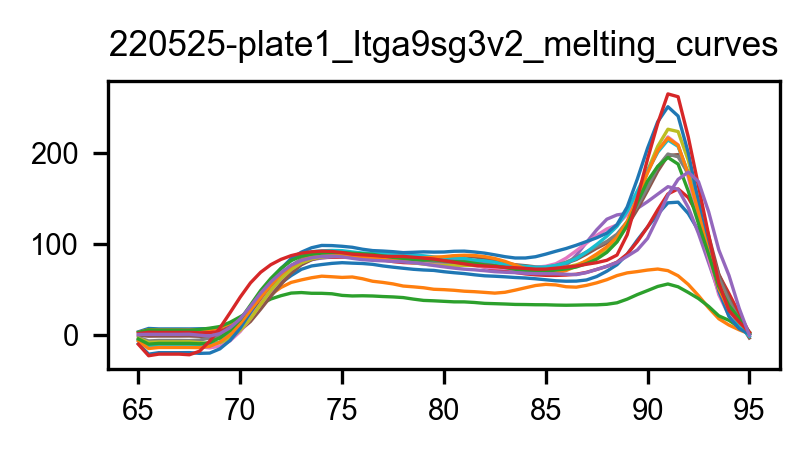

In [14]:
# Insepct the amplification and melting curves of each plate per primer to check
# if there are problematic data that should be excluded
primers = ['Rps29 v1', 
           'Itga9 sg1 v1',  'Itga9 sg1 v2',
           'Itga9 sg2 v1',  'Itga9 sg2 v2',
           'Itga9 sg3 v1',  'Itga9 sg3 v2']
for plate_id in plate_ids:
#     df_annotation = get_annotation_data(plate_id)
    for primer in primers:
        plot_amplification_curves(plate_id, primer)
        plot_melting_curves(plate_id, primer)